<a href="https://colab.research.google.com/github/janjuatest/Public-Sector/blob/main/GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about the indentification of various social economic factors that can affect GDP per Capita after PPP of countries. The analysis is not exhaustive

Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Install  and import the World Bank data api


In [3]:
!pip install -U wbdata

In [4]:
import wbdata,datetime

Read the data from Figure 2.1 of World Happiness Report .
Data is avaiable at 
https://happiness-report.s3.amazonaws.com/2020/WHR20_DataForFigure2.1.xls
Helliwell, John F., Richard Layard, Jeffrey Sachs, and Jan-Emmanuel De Neve, eds. 2020. World Happiness Report 2020. New York: Sustainable Development Solutions Network

In [ ]:
happDF=pd.read_excel('happiness.xls')

Renaming the columns so that they are more readable

DeathsTM is main target column which has the Total Covid-19 Deaths per 100,000 population

In [ ]:
happDF=happDF[['Country name','Ladder score']]

We will only take the main Ladder Score from the report.
Higher the ladder score the happier the country

In [ ]:
happDF

,Country name,Ladder score
0,Finland,7.8087
1,Denmark,7.6456
2,Switzerland,7.5599
3,Iceland,7.5045
4,Norway,7.4880
...,...,...
148,Central African Republic,3.4759
149,Rwanda,3.3123
150,Zimbabwe,3.2992
151,South Sudan,2.8166


Sort the dataframe with highest number of deaths per capita

In [ ]:
happDF.columns=['Country','Score']

In [ ]:
happDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  153 non-null    object 
 1   Score    153 non-null    float64
 2   deaths   153 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.7+ KB


Start from here after uploading and reading happDF

In [4]:
wbdata.get_country("USA")

id    name
----  -------------
USA   United States

In [8]:
countries = [i['id'] for i in wbdata.get_country()] 

List of all countries/regions for which data is avalaible in World Bank data api. The number is 297 because you also have different regions

In [9]:
len(countries)

297

The code below collects the data from the World Bank data api

In [ ]:
data_date = datetime.datetime(2019, 1,1), datetime.datetime(2019, 1, 1)
indicator1={"SP.POP.DPND":"PopDep","IC.BUS.EASE.XQ": "EaseofB","NY.GDP.PCAP.PP.CD":"GDPpppPC","SP.POP.GROW":"PopGrowth","SP.URB.TOTL.IN.ZS":"UrbanPop"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df1=pd.concat([wbdf1,wbdf2],axis=0)

In [10]:
data_date = datetime.datetime(2019, 1,1), datetime.datetime(2019, 1, 1)
indicator1={"NE.EXP.GNFS.CD":"Exports","BX.KLT.DINV.CD.WD":"FDI","DT.DOD.PVLX.CD":"ForDebt"}#
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df2=pd.concat([wbdf1,wbdf2],axis=0)

In [11]:
wbdf

,country,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore
0,Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497
2,Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838
3,Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847
4,Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473
259,"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299
260,South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897
261,Zambia,87.188180,85.0,3624.024939,2.892373,44.072,3.74792,1.429305,0.1628,62.464000,39.812622,48.295769,11.0,12.01,3.7594,66.93648


In [12]:
wbdf.set_index('country',inplace=True)

In [36]:
wbdf2=pd.concat([wbdf,df1,df2],join='outer',axis=1)

Using the above code you can download the data for each indicator and then combine the dataframes to make a master dataframe that has the data for all the countries. 
This is wbdf above

In [37]:
wbdf2

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt,Exports,FDI,ForDebt,FemaleLit
country,,,,,,,,,,,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-7.604174e+07,NaN,NaN,-7.604174e+07,NaN,96.719780
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09,NaN,2.340455e+07,1.943399e+09,NaN
Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10,3.602087e+10,-4.098479e+09,4.052814e+10,NaN
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09,4.821431e+09,1.201022e+09,4.980870e+09,NaN
Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08,2.315662e+09,2.850816e+08,4.838109e+08,NaN
"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299,NaN,-3.709828e+08,5.622578e+09,NaN,-3.709828e+08,5.622578e+09,NaN
South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10,1.049158e+11,4.624503e+09,7.610179e+10,91.713989


Lets get data for one more indicator i.e. Female Literacy Rate and then combine it into our master dataframe wbdf

In [32]:
data_date = datetime.datetime(2010, 1,1), datetime.datetime(2010, 1, 1)
indicator1={"SE.ADT.LITR.FE.ZS":"FemaleLit"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df2=pd.concat([wbdf1,wbdf2],axis=0)

In [33]:
df2.notna().sum()

FemaleLit    92
dtype: int64

We only have data from 92 countries for female literacy and that too is also quite old (2010) so lets drop the variable

In [20]:
wbdf=pd.concat([wbdf,df2],join='outer',axis=1)

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt,FemaleLit,FemaleLit
country,,,,,,,,,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-7.604174e+07,NaN,NaN,NaN
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09,NaN,NaN
Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10,NaN,NaN
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09,NaN,NaN
Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08,NaN,NaN
"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299,NaN,-3.709828e+08,5.622578e+09,NaN,NaN
South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10,NaN,86.458633


In [35]:
wbdf.drop(columns=['FemaleLit'],axis=1,inplace=True)

In [38]:
wbdf

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt
country,,,,,,,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-7.604174e+07,NaN
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09
Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09
Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08
"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299,NaN,-3.709828e+08,5.622578e+09
South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10


There are several null values in the data that may not be considered

In [ ]:
wbdf.reset_index(inplace=True)

In [ ]:
wbdf.drop('index',axis=1,inplace=True)

In [44]:
wbdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, Aruba to Zimbabwe
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PopDep       238 non-null    float64
 1   EaseofB      188 non-null    float64
 2   GDPpppPC     231 non-null    float64
 3   PopGrowth    261 non-null    float64
 4   UrbanPop     259 non-null    float64
 5   GexpEdu      141 non-null    float64
 6   MilExpGdp    192 non-null    float64
 7   HosBedP1000  112 non-null    float64
 8   LifeExp      246 non-null    float64
 9   ElecAces     260 non-null    float64
 10  Fem%Lab      232 non-null    float64
 11  Patents      151 non-null    float64
 12  UnemplR      232 non-null    float64
 13  HappScore    147 non-null    float64
 14  EofBScore    235 non-null    float64
 15  Exports      197 non-null    float64
 16  FDI          242 non-null    float64
 17  ForDebt      131 non-null    float64
dtypes: float64(18)
memory usage: 49.0+ KB


Lets look at the columns, they are all numeric and the stats of the columns are given below

In [45]:
wbdf.describe()

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt
count,238.000000,188.000000,231.000000,261.000000,259.000000,141.000000,192.000000,112.000000,246.000000,260.000000,232.000000,1.510000e+02,232.000000,147.000000,235.000000,1.970000e+02,2.420000e+02,1.310000e+02
mean,58.788051,96.239362,21844.682252,1.211838,60.399617,4.399784,1.940191,1.941442,72.058077,86.045031,40.906096,1.412285e+05,7.007797,5.477193,62.540146,1.024571e+12,5.353613e+10,1.241614e+11
std,15.586271,54.799695,22374.104184,1.056053,22.788811,1.327613,1.545404,1.629764,7.490438,23.293025,9.149095,4.214469e+05,4.916085,1.122692,13.102921,3.051465e+12,1.755307e+11,4.598702e+11
min,17.812083,1.000000,784.926989,-1.805226,13.250000,1.370930,0.000000,0.012800,51.593000,11.024252,7.895299,1.000000e+00,0.110000,2.566900,20.039580,2.360177e+07,-4.663323e+10,8.307576e+07
25%,48.991630,49.750000,5435.141540,0.456356,42.236500,3.419300,1.113182,0.435225,67.249000,82.055481,38.833187,3.400000e+01,3.827500,4.726700,54.248063,6.079488e+09,2.134498e+08,1.775009e+09
50%,54.683418,96.500000,14289.960502,1.127924,61.229000,4.421020,1.532019,1.848600,73.362479,99.997504,43.724598,4.700000e+02,5.590000,5.539900,61.350780,4.497355e+10,1.505959e+09,7.553373e+09
75%,68.070138,143.250000,30532.294889,1.951209,80.234500,5.207540,2.239086,3.199200,77.393963,100.000000,46.709541,8.134500e+03,8.948901,6.221400,73.441609,4.362693e+11,1.665722e+10,3.253276e+10
max,110.255774,190.000000,129451.063933,4.469239,100.000000,8.051940,12.034846,7.954100,84.226829,100.000000,55.956589,2.294881e+06,26.910000,7.808700,86.764650,2.488971e+13,1.630976e+12,3.275542e+12


The code below will copy the happiness score from the World Happiness Index Report for each country into the master dataframe



In [46]:
wbdf.columns

Index(['PopDep', 'EaseofB', 'GDPpppPC', 'PopGrowth', 'UrbanPop', 'GexpEdu',
       'MilExpGdp', 'HosBedP1000', 'LifeExp', 'ElecAces', 'Fem%Lab', 'Patents',
       'UnemplR', 'HappScore', 'EofBScore', 'Exports', 'FDI', 'ForDebt'],
      dtype='object')

Lets rename the columns so that they are more readable

In [47]:
wbdf.columns=['Population Dependence %', 'Ease of Doing Business Ranking', 'GDP per Capita (PPP)', 'Population Growth Rate', 'Urban Population (% of Total)', 'GexpEdu',
       'MilExpGdp', 'HosBedP1000', 'Life Expectancy', 'Elecricty Access', 'Fem%Lab', 'Patents',
       'UnemplR', 'World Happiness Report Score', 'Ease of Business Score', 'Total Exports ($)', 'Foreign Direct Investment', 'Total Foreign Debt($)']

In [ ]:
for i in happDF.index:
  score=happDF.iloc[i]['Score']
  country=happDF['Country'][i]
  wbdf.loc[wbdf['country']==country,'HappScore']=score
  if ((wbdf['country']==country).sum()==0):
    print(country)
  #print(dfwho['Country'][i],deathsTM)

Taiwan Province of China
Slovenia
Slovakia
South Korea
Russia
Kyrgyzstan
North Cyprus
Hong Kong S.A.R. of China
Ivory Coast
Congo (Brazzaville)
Macedonia
Venezuela
Laos
Gambia
Iran
Palestinian Territories
Congo (Kinshasa)
Swaziland
Egypt
Yemen


The list above identifies countries with different names in the World Bank database and Happiness report. The data for these countries has to be filled manually as below

In [ ]:
wbdf[wbdf['country'].str.contains("Yemen")]


,country,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore
259,"Yemen, Rep.",72.787716,187.0,NaN,2.30058,37.273,NaN,NaN,NaN,66.087,62.0,7.895299,NaN,13.01,NaN


In [ ]:
wbdf.loc[wbdf['country'].str.contains("Yemen"),'HappScore']=3.52

In [ ]:
happDF[happDF['Country'].str.contains("Yemen")]

,Country,Score,deaths
145,Yemen,3.5274,20.65


The above three lines manually fills the data 
for countries with different names in the two databases
Note: The above only shows one example. This was done for all countries in the list above

In [41]:
wbdf[wbdf['HappScore'].isnull() | wbdf['EaseofB'].isnull()]

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt
country,,,,,,,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546000,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-7.604174e+07,NaN
Angola,95.394042,177.0,6965.511374,3.242983,66.177000,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.000000,NaN,41.288380,3.602087e+10,-4.098479e+09,4.052814e+10
Andorra,NaN,NaN,NaN,0.176454,87.984000,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,61.081801,NaN,15256.338996,1.924693,59.201647,NaN,6.152311,NaN,71.436497,89.286856,20.368759,3807.0,10.256798,NaN,56.543224,1.273419e+12,3.350713e+10,NaN
American Samoa,NaN,NaN,NaN,-0.276231,87.147000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
British Virgin Islands,NaN,NaN,NaN,0.762138,48.116000,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.799684e+10,NaN
Virgin Islands (U.S.),64.930706,NaN,NaN,-0.323958,95.832000,NaN,NaN,NaN,79.268293,100.000000,49.115615,NaN,7.990000,NaN,NaN,NaN,NaN,NaN
Vanuatu,73.390305,107.0,3292.544065,2.430920,25.394000,NaN,NaN,0.1653,70.021000,61.864769,43.577945,NaN,1.720000,NaN,61.051910,NaN,4.100000e+07,2.658513e+08


Lets look at the data for one country Pakistan

In [42]:
wbdf.loc['Pakistan']

PopDep         6.495331e+01
EaseofB        1.080000e+02
GDPpppPC       4.898051e+03
PopGrowth      2.029215e+00
UrbanPop       3.690700e+01
GexpEdu        3.002920e+00
MilExpGdp      3.594750e+00
HosBedP1000    9.620000e-01
LifeExp        6.677000e+01
ElecAces       7.109155e+01
Fem%Lab        2.013498e+01
Patents        3.060000e+02
UnemplR        4.080000e+00
HappScore      5.693300e+00
EofBScore      6.095491e+01
Exports        2.815332e+10
FDI            2.218000e+09
ForDebt        7.223150e+10
Name: Pakistan, dtype: float64

The heatmap below shows the correlation of variables with each other

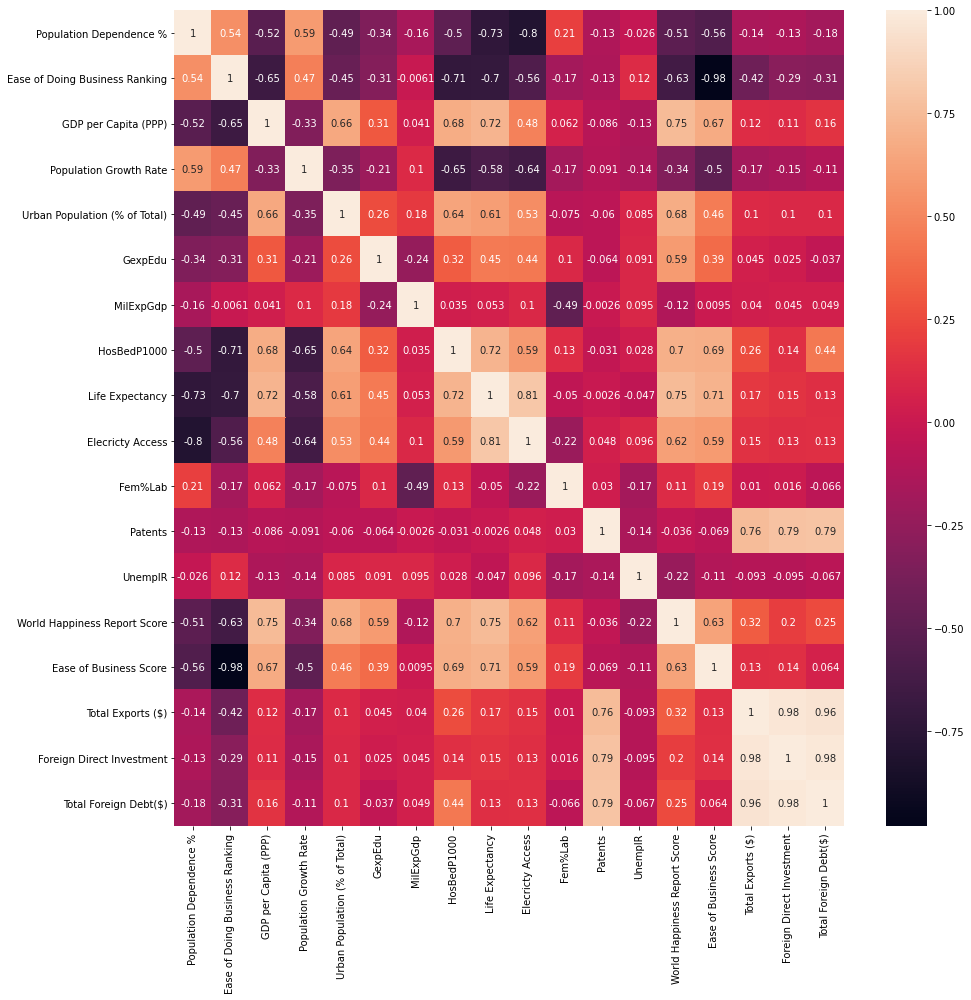

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(wbdf.corr(),annot=True)

The heatmap shows that some variables are not correlated with GDP so may be dropped e.g. Military Expenditure as % of GDP, patents, Female Labor Particpate rate. These variables will be dropped

In [51]:
wbdf.columns

Index(['Population Dependence %', 'Ease of Doing Business Ranking',
       'GDP per Capita (PPP)', 'Population Growth Rate',
       'Urban Population (% of Total)', 'GexpEdu', 'MilExpGdp', 'HosBedP1000',
       'Life Expectancy', 'Elecricty Access', 'Fem%Lab', 'Patents', 'UnemplR',
       'World Happiness Report Score', 'Ease of Business Score',
       'Total Exports ($)', 'Foreign Direct Investment',
       'Total Foreign Debt($)'],
      dtype='object')

In [63]:
wbdfSmall=wbdf.drop(columns=['GexpEdu', 'MilExpGdp', 'HosBedP1000','Fem%Lab','Fem%Lab','UnemplR','Patents'])

In [64]:
wbdfSmall

,Population Dependence %,Ease of Doing Business Ranking,GDP per Capita (PPP),Population Growth Rate,Urban Population (% of Total),Life Expectancy,Elecricty Access,World Happiness Report Score,Ease of Business Score,Total Exports ($),Foreign Direct Investment,Total Foreign Debt($)
country,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546,75.868000,100.000000,NaN,NaN,NaN,-7.604174e+07,NaN
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,63.763000,98.713203,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09
Angola,95.394042,177.0,6965.511374,3.242983,66.177,59.925000,43.259258,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,78.194000,100.000000,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09
Andorra,NaN,NaN,NaN,0.176454,87.984,NaN,100.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,71.646341,100.000000,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08
"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,66.087000,62.000000,3.5200,31.76299,NaN,-3.709828e+08,5.622578e+09
South Africa,52.400879,84.0,13034.164661,1.338617,66.856,63.153000,91.229874,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10


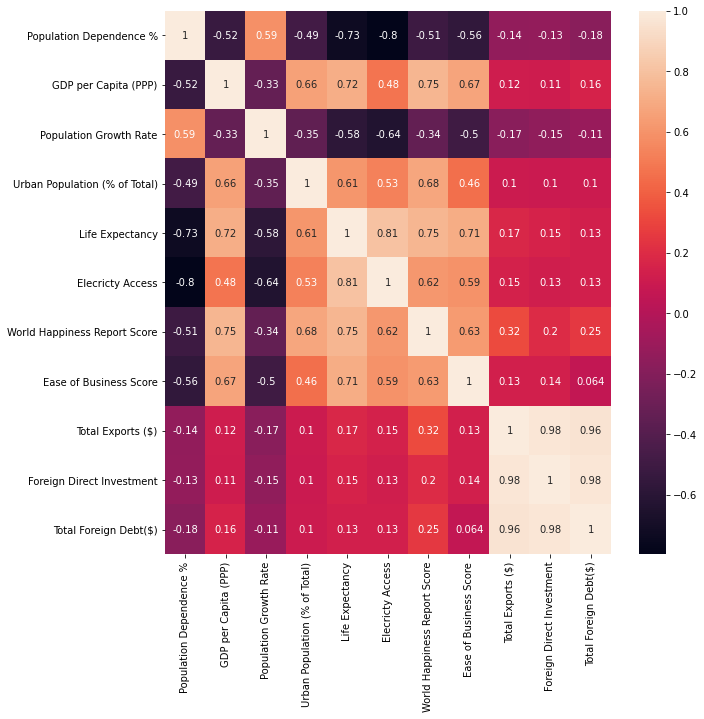

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(wbdfSmall.corr(),annot=True)

In [ ]:
wbdfSmall

In [65]:
wbdfSmall.isnull().sum()

Population Dependence %            25
Ease of Doing Business Ranking     75
GDP per Capita (PPP)               32
Population Growth Rate              2
Urban Population (% of Total)       4
Life Expectancy                    17
Elecricty Access                    3
World Happiness Report Score      116
Ease of Business Score             28
Total Exports ($)                  66
Foreign Direct Investment          21
Total Foreign Debt($)             132
dtype: int64

In [67]:
df=wbdfSmall[wbdfSmall['Ease of Doing Business Ranking'].notna()]

df above is the dataframe we will use since it contains data for 188 countries and not regions

In [18]:
df=pd.read_csv('df.csv')

In [19]:
df=df[df['GDP per Capita (PPP)'].notna()]

Only selecting the data of countries for which the target variable i.e. GDP per Capita (PPP) is avaiable
There are 179 such countries

In [26]:
df.drop(columns='Ease of Doing Business Ranking',inplace=True)

In [22]:
df.set_index('country',inplace=True)

In [27]:
df.columns

Index(['Population Dependence %', 'GDP per Capita (PPP)',
       'Population Growth Rate', 'Urban Population (% of Total)',
       'Life Expectancy', 'Elecricty Access', 'World Happiness Report Score',
       'Ease of Business Score', 'Total Exports ($)',
       'Foreign Direct Investment', 'Total Foreign Debt($)'],
      dtype='object')

Now lets do some EDA on the data

Our target variable for this analysis is GDP per Capita (PPP) as noted before also

In [28]:
df.corrwith(df['GDP per Capita (PPP)']).sort_values(ascending=False)

GDP per Capita (PPP)             1.000000
World Happiness Report Score     0.750944
Life Expectancy                  0.711489
Urban Population (% of Total)    0.646582
Ease of Business Score           0.639667
Elecricty Access                 0.485304
Total Exports ($)                0.406982
Total Foreign Debt($)            0.403224
Foreign Direct Investment        0.265154
Population Growth Rate          -0.305781
Population Dependence %         -0.528428
dtype: float64

In [6]:
df.corrwith(df['GDP per Capita (PPP)']).sort_values(ascending=False)

GDP per Capita (PPP)              1.000000
World Happiness Report Score      0.750944
Life Expectancy                   0.711489
Urban Population (% of Total)     0.646582
Ease of Business Score            0.639667
Elecricty Access                  0.485304
Total Exports ($)                 0.406982
Total Foreign Debt($)             0.403224
Foreign Direct Investment         0.265154
Population Growth Rate           -0.305781
Population Dependence %          -0.528428
Ease of Doing Business Ranking   -0.654750
dtype: float64

(3.0, 8.0)

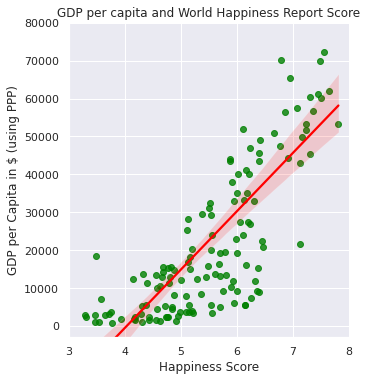

In [7]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=df,y='GDP per Capita (PPP)',x='World Happiness Report Score',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('GDP per capita and World Happiness Report Score')
# Set x-axis label
plt.xlabel('Happiness Score')
# Set y-axis label
plt.ylabel('GDP per Capita in $ (using PPP)')
axes=lm.axes
axes[0,0].set_ylim(-3000,80000)
axes[0,0].set_xlim(3,8)


(-3000.0, 80000.0)

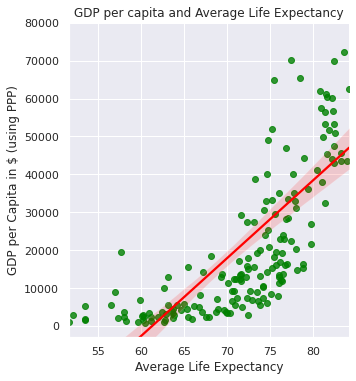

In [8]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=df,y='GDP per Capita (PPP)',x='Life Expectancy',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('GDP per capita and Average Life Expectancy')
# Set x-axis label
plt.xlabel('Average Life Expectancy')
# Set y-axis label
plt.ylabel('GDP per Capita in $ (using PPP)')
axes=lm.axes
axes[0,0].set_ylim(-3000,80000)
#axes[0,0].set_xlim(2,8)


Lets first look at GDP per capita and Ease of Business Score

(30.0, 90.0)

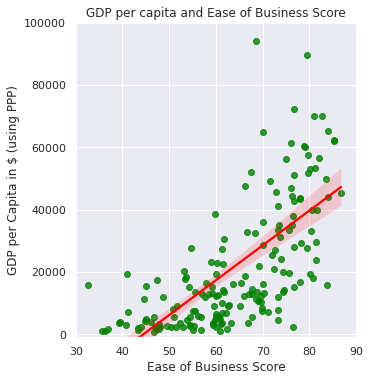

In [9]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=df,y='GDP per Capita (PPP)',x='Ease of Business Score',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('GDP per capita and Ease of Business Score')
# Set x-axis label
plt.xlabel('Ease of Business Score')
# Set y-axis label
plt.ylabel('GDP per Capita in $ (using PPP)')
axes=lm.axes
axes[0,0].set_ylim(-1000,100000)
axes[0,0].set_xlim(30,90)

#lm.savefig("output2.png")
#files.download("output2.png")

(0.0, 100.0)

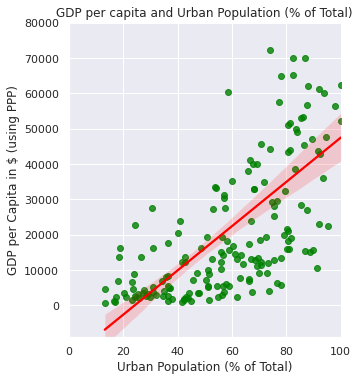

In [15]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=df,y='GDP per Capita (PPP)',x='Urban Population (% of Total)',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('GDP per capita and Urban Population (% of Total)')
# Set x-axis label
plt.xlabel('Urban Population (% of Total)')
# Set y-axis label
plt.ylabel('GDP per Capita in $ (using PPP)')
axes=lm.axes
axes[0,0].set_ylim(-9000,80000)
axes[0,0].set_xlim(0,100)

(-9000.0, 80000.0)

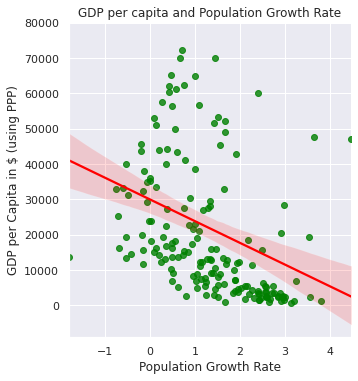

In [26]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=df,y='GDP per Capita (PPP)',x='Population Growth Rate',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('GDP per capita and Population Growth Rate')
# Set x-axis label
plt.xlabel('Population Growth Rate')
# Set y-axis label
plt.ylabel('GDP per Capita in $ (using PPP)')
axes=lm.axes
axes[0,0].set_ylim(-9000,80000)
#axes[0,0].set_xlim(0,100)

In [27]:
df.columns

Index(['country', 'Ease of Doing Business Ranking', 'GDP per Capita (PPP)',
       'Population Growth Rate', 'Urban Population (% of Total)',
       'Life Expectancy', 'Elecricty Access', 'World Happiness Report Score',
       'Ease of Business Score', 'Total Exports ($)',
       'Foreign Direct Investment', 'Total Foreign Debt($)'],
      dtype='object')

Now lets start the machine learning part and use the Scikit learn Lasso regression model

Lets first fill the missing values with 0 since they are not many there

In [45]:
df.isnull().sum()

Population Dependence %           4
GDP per Capita (PPP)              0
Population Growth Rate            0
Urban Population (% of Total)     1
Life Expectancy                   3
Elecricty Access                  0
World Happiness Report Score     37
Ease of Business Score            0
Total Exports ($)                28
Foreign Direct Investment         2
Total Foreign Debt($)            65
dtype: int64

In [47]:
df.fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [48]:
df.isnull().sum()

Population Dependence %          0
GDP per Capita (PPP)             0
Population Growth Rate           0
Urban Population (% of Total)    0
Life Expectancy                  0
Elecricty Access                 0
World Happiness Report Score     0
Ease of Business Score           0
Total Exports ($)                0
Foreign Direct Investment        0
Total Foreign Debt($)            0
dtype: int64

In [33]:
from sklearn.linear_model import Lasso

In [34]:
from sklearn.model_selection import train_test_split

Let's separate the data into train and test parts

I will remove Pakistan from the data since that is my beloved homeland and we will predict its value

In [38]:
dfp=df[df.index=='Pakistan']

In [39]:
dfp

,Population Dependence %,GDP per Capita (PPP),Population Growth Rate,Urban Population (% of Total),Life Expectancy,Elecricty Access,World Happiness Report Score,Ease of Business Score,Total Exports ($),Foreign Direct Investment,Total Foreign Debt($)
country,,,,,,,,,,,
Pakistan,64.953312,4898.05057,2.029215,36.907,66.77,71.091547,5.6933,60.95491,2.815332e+10,2.218000e+09,7.223150e+10


In [40]:
df=df[df.index!='Pakistan']

In [41]:
df

,Population Dependence %,GDP per Capita (PPP),Population Growth Rate,Urban Population (% of Total),Life Expectancy,Elecricty Access,World Happiness Report Score,Ease of Business Score,Total Exports ($),Foreign Direct Investment,Total Foreign Debt($)
country,,,,,,,,,,,
Afghanistan,82.109775,2156.419482,2.311817,25.754,63.763000,98.713203,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09
Angola,95.394042,6965.511374,3.242983,66.177,59.925000,43.259258,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10
Albania,46.203522,14648.267402,-0.426007,61.229,78.194000,100.000000,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09
United Arab Emirates,18.862478,70089.324038,1.438780,86.789,77.470000,100.000000,6.7908,80.91489,3.893724e+11,1.378747e+10,NaN
Argentina,55.857033,23040.287953,0.993397,91.991,76.221000,100.000000,5.9747,58.96151,7.768432e+10,6.663062e+09,2.146662e+11
...,...,...,...,...,...,...,...,...,...,...,...
Samoa,74.816622,6795.684073,0.491829,18.056,72.895000,100.000000,NaN,62.07404,3.164139e+08,1.019330e+06,3.418577e+08
Kosovo,NaN,11870.797576,-0.157992,NaN,71.646341,100.000000,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08
South Africa,52.400879,13034.164661,1.338617,66.856,63.153000,91.229874,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10


In [49]:
X=df.drop('GDP per Capita (PPP)',axis=1)

The input will be all the variables other than the target GDP variable

In [50]:
y=df['GDP per Capita (PPP)']

The traget is the GDP per Capita as stored in y

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

We have seperated the data into a test part and the training part . Test part is 10% of data, usually a value of 25% is used but since we have limited number of countries we will be using 10%

In [78]:
myLasso=Lasso(alpha=10)

We are using the value of 1 for the hyper parameter alpha

In [79]:
myLasso.fit(X_train,y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

The model has been trained on the data above
Lets now predict the test values

In [80]:
predictions=myLasso.predict(X_test)

Lets now measure the root mean square error in our estimation

Importing the error measures

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [81]:
print(f"The root mean square error is {mean_squared_error(y_test,predictions)**0.5} for Lasso regression")
print(f"The R squared value is {r2_score(y_test,predictions)}")

The root mean square error is 19181.48818000544 for Lasso regression
The R squared value is 0.3526264531674238


In [76]:
myLasso.predict(dfp.drop('GDP per Capita (PPP)',axis=1))

array([4071.20559251])

In [29]:
from google.colab import files

In [30]:
df.to_csv('df.csv')

In [31]:
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>